In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
#bring in mushroom data
df_m = pd.read_csv('../data/mushquery.csv')
#df.info()
df_m.head()

,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long
0,488305,63622,1990-03-10,1436,999.0,999.0,63622,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Galeropsidaceae,OR,WEST,44.56300,-123.28350
1,518156,3683,1990-06-21,24157,999.0,999.0,3683,Eukarya,Fungi,Ascomycota,Leotiomycetes,Pezizales,Sarcoscyphaceae,MN,MIDWEST,45.02525,-93.61570
2,518163,3599,1990-06-28,24157,999.0,999.0,3599,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Physalacriaceae,MN,MIDWEST,45.02525,-93.61570
3,448480,281,1990-07-04,24157,999.0,999.0,281,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Crepidotaceae,MN,MIDWEST,45.02525,-93.61570
4,31341,43745,1990-07-15,789,999.0,999.0,43745,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Amanitaceae,OH,MIDWEST,40.64390,-80.56065


In [74]:
#fix date, from obj to date
df_m['date']=pd.to_datetime(df_m['date'])
#Separate out into decades
df_2010s = df_m[df_m['date'].between('2010-01-01', '2019-12-31')]
#df_2010s
#create year column on the end
df_2010s['year']= df_2010s['date'].dt.year
df_2010s

C:\Users\cjami\AppData\Local\Temp\ipykernel_53444\4270386044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010s['year']= df_2010s['date'].dt.year


,id,name_id,date,location_id,lat,long,name_id-2,domain,kingdom,phylum,class,order,family,state,region,location_lat,location_long,year
22128,31409,30271,2010-01-01,768,999.0000,999.0000,30271,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Agaricaceae,CA,WEST,34.10160,-118.35000,2010
22129,62402,22603,2010-01-01,539,999.0000,999.0000,22603,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Russulales,Russulaceae,CA,WEST,38.01575,-122.66250,2010
22130,34680,43604,2010-01-01,2243,999.0000,999.0000,43604,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Boletales,Boletaceae,CA,WEST,37.59900,-122.01850,2010
22131,31239,150,2010-01-01,1033,999.0000,999.0000,150,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Mycenaceae,CA,WEST,37.92265,-122.18150,2010
22132,31269,47544,2010-01-01,2299,999.0000,999.0000,47544,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,CA,WEST,38.44160,-122.50800,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218116,398947,3420,2019-12-31,11485,999.0000,999.0000,3420,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Polyporaceae,TX,SOUTH,30.56305,-96.21770,2019
218117,398950,3420,2019-12-31,11485,999.0000,999.0000,3420,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Polyporales,Polyporaceae,TX,SOUTH,30.56305,-96.21770,2019
218118,414130,15162,2019-12-31,5,999.0000,999.0000,15162,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Bolbitiaceae,CA,WEST,38.77325,-123.53800,2019
218119,414056,306,2019-12-31,5,999.0000,999.0000,306,Eukarya,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Clitocybaceae,CA,WEST,38.77325,-123.53800,2019


In [97]:
#get overall counts per year

overall_count = df_2010s.groupby('year')['id'].count()
#type(overall_count)
#reset index to put it back as dataframe with label
m_counts = overall_count.reset_index()
m_counts

,year,id
0,2010,10756
1,2011,14228
2,2012,17057
3,2013,17416
4,2014,20127
5,2015,17097
6,2016,20373
7,2017,22598
8,2018,31350
9,2019,24991


In [58]:
#pull out GA
explore_georgia = df_2010s[df_2010s['state']=='GA']
#explore_georgia
#find count per year
ga_obs_peryr = explore_georgia.groupby('year')['id'].count()
ga_obs_peryr
#keep it as a dataframe
ga_obs_peryr_df = pd.DataFrame({'Observations':ga_obs_peryr})
#needs an index to line up with the avg/precip dataframes
ga_obs_peryr_df.reset_index(inplace=True)
ga_obs_peryr_df


,year,Observations
0,2010,147
1,2011,234
2,2012,641
3,2013,381
4,2014,217
5,2015,561
6,2016,249
7,2017,935
8,2018,4011
9,2019,1173


In [113]:
#pull out CA
explore_california = df_2010s[df_2010s['state']=='CA']
#explore_california
#find count per year
ca_obs_peryr = explore_california.groupby('year')['id'].count()
ca_obs_peryr 
#keep it as a dataframe
ca_obs_peryr_df = pd.DataFrame({'Observations':ca_obs_peryr})
#needs an index to line up with the avg/precip dataframes
ca_obs_peryr_df.reset_index(inplace=True)
ca_obs_peryr_df


,year,Observations
0,2010,4543
1,2011,3969
2,2012,4271
3,2013,3845
4,2014,6028
5,2015,3575
6,2016,4105
7,2017,4556
8,2018,3659
9,2019,3769


In [114]:
#pull out PA
explore_penn = df_2010s[df_2010s['state']=='PA']
explore_penn
#find count per year
pa_obs_peryr = explore_penn.groupby('year')['id'].count()
pa_obs_peryr
#keep it as a dataframe
pa_obs_peryr_df = pd.DataFrame({'Observations':pa_obs_peryr})
#needs an index to line up with the avg/precip dataframes
pa_obs_peryr_df.reset_index(inplace=True)
pa_obs_peryr_df

,year,Observations
0,2010,636
1,2011,1770
2,2012,1930
3,2013,2009
4,2014,1834
5,2015,2055
6,2016,2320
7,2017,2109
8,2018,2017
9,2019,1556


In [81]:
#pull in TEMPERATURE data
df_tavg_dict = pd.read_excel('../data/tavg.xlsx',sheet_name = None)
#all are imported as dictionary, sheet names are the keys, use concate and ignore_index to make it into DF
df_tavg = pd.concat(df_tavg_dict.values(),ignore_index=True)
df_tavg

,year,state,temp,region
0,2010,AL,62.7,SOUTH
1,2010,AR,60.4,SOUTH
2,2010,AZ,61.2,WEST
3,2010,CA,57.7,WEST
4,2010,CO,46.2,WEST
...,...,...,...,...
523,2020,VT,57.4,NORTHEAST
524,2020,WA,48.1,WEST
525,2020,WI,54.0,MIDWEST
526,2020,WV,44.8,SOUTH


In [82]:
#Pull in PRECIPITATION DATA
df_precip_dict = pd.read_excel('../data/precip.xlsx',sheet_name = None)
#all are imported as dictionary, sheet names are the keys, use concate and ignore_index to make it into DF
df_precip = pd.concat(df_precip_dict.values(),ignore_index=True)
df_precip

,year,state,precip,region
0,2010,AL,47.19,SOUTH
1,2010,AR,13.91,SOUTH
2,2010,AZ,38.79,WEST
3,2010,CA,31.18,WEST
4,2010,CO,18.19,WEST
...,...,...,...,...
523,2020,VT,61.40,NORTHEAST
524,2020,WA,45.25,WEST
525,2020,WI,53.77,MIDWEST
526,2020,WV,34.19,SOUTH


In [83]:
#Isolate Georgia Average Temps
ga_temp = df_tavg[df_tavg['state']=='GA']
ga_temp

,year,state,temp,region
8,2010,GA,63.0000,SOUTH
56,2011,GA,64.6000,SOUTH
104,2012,GA,65.5000,SOUTH
152,2013,GA,63.4000,SOUTH
200,2014,GA,62.9667,SOUTH
248,2015,GA,65.3083,SOUTH
296,2016,GA,65.7917,SOUTH
344,2017,GA,65.8250,SOUTH
392,2018,GA,65.0833,SOUTH
440,2019,GA,66.2000,SOUTH


In [84]:
#Isolate GA Precipitation
ga_precip = df_precip[df_precip['state']=='GA']
ga_precip

,year,state,precip,region
8,2010,GA,43.04,SOUTH
56,2011,GA,40.11,SOUTH
104,2012,GA,42.02,SOUTH
152,2013,GA,63.49,SOUTH
200,2014,GA,51.41,SOUTH
248,2015,GA,55.74,SOUTH
296,2016,GA,40.90,SOUTH
344,2017,GA,49.80,SOUTH
392,2018,GA,60.80,SOUTH
440,2019,GA,47.89,SOUTH


In [116]:
#Isolate CA Average Temps
ca_temp = df_tavg[df_tavg['state']=='CA']
ca_temp

,year,state,temp,region
3,2010,CA,57.7000,WEST
51,2011,CA,57.4000,WEST
99,2012,CA,59.5000,WEST
147,2013,CA,59.3000,WEST
195,2014,CA,61.4500,WEST
243,2015,CA,60.7583,WEST
291,2016,CA,60.1333,WEST
339,2017,CA,60.3417,WEST
387,2018,CA,60.1250,WEST
435,2019,CA,58.4000,WEST


In [117]:
#Isolate CA Precipitation
ca_precip = df_precip[df_precip['state']=='CA']
ca_precip

,year,state,precip,region
3,2010,CA,31.18,WEST
51,2011,CA,18.79,WEST
99,2012,CA,23.45,WEST
147,2013,CA,7.93,WEST
195,2014,CA,19.90,WEST
243,2015,CA,15.04,WEST
291,2016,CA,25.73,WEST
339,2017,CA,28.17,WEST
387,2018,CA,18.09,WEST
435,2019,CA,29.12,WEST


In [118]:
#Isolate PA Average Temps
pa_temp = df_tavg[df_tavg['state']=='PA']
pa_temp

,year,state,temp,region
35,2010,PA,50.1000,NORTHEAST
83,2011,PA,50.4000,NORTHEAST
131,2012,PA,51.8000,NORTHEAST
179,2013,PA,49.0000,NORTHEAST
227,2014,PA,47.4333,NORTHEAST
275,2015,PA,49.4583,NORTHEAST
323,2016,PA,50.9333,NORTHEAST
371,2017,PA,50.6083,NORTHEAST
419,2018,PA,49.7583,NORTHEAST
467,2019,PA,49.9000,NORTHEAST


In [119]:
#Isolate PA Precipitation
pa_precip = df_precip[df_precip['state']=='PA']
pa_precip

,year,state,precip,region
35,2010,PA,42.31,NORTHEAST
83,2011,PA,61.00,NORTHEAST
131,2012,PA,43.49,NORTHEAST
179,2013,PA,41.82,NORTHEAST
227,2014,PA,42.43,NORTHEAST
275,2015,PA,43.10,NORTHEAST
323,2016,PA,39.00,NORTHEAST
371,2017,PA,46.61,NORTHEAST
419,2018,PA,64.04,NORTHEAST
467,2019,PA,50.78,NORTHEAST


In [85]:
#NOT USED 
#Combine temps and precip for GA  - axis=1 concatenates horizontally instead of vertically
#since the year, state and region are the same, i only want to pick up the precipitation column
ga_precip_col = ga_precip['precip']
ga_combined = pd.concat([ga_temp,ga_precip_col],axis=1)
ga_combined

,year,state,temp,region,precip
8,2010,GA,63.0000,SOUTH,43.04
56,2011,GA,64.6000,SOUTH,40.11
104,2012,GA,65.5000,SOUTH,42.02
152,2013,GA,63.4000,SOUTH,63.49
200,2014,GA,62.9667,SOUTH,51.41
248,2015,GA,65.3083,SOUTH,55.74
296,2016,GA,65.7917,SOUTH,40.90
344,2017,GA,65.8250,SOUTH,49.80
392,2018,GA,65.0833,SOUTH,60.80
440,2019,GA,66.2000,SOUTH,47.89


In [98]:
#Overall Temp Average - need the same # of columns to make scatter work
overall_tavg = df_tavg.groupby('year')['temp'].mean()
#type(overall_tavg)
#reset index to put it back as dataframe with label
all_temps = overall_tavg.reset_index()
all_temps

,year,temp
0,2010,52.783333
1,2011,52.914583
2,2012,54.839583
3,2013,51.891667
4,2014,51.528994
5,2015,53.534204
6,2016,54.366325
7,2017,53.937850
8,2018,53.011285
9,2019,52.437500


In [101]:
#Overall Precip - need the same # of columns to make scatter work
overall_precip = df_precip.groupby('year')['precip'].mean()
#type(overall_tavg)
#reset index to put it back as dataframe with label
all_precip = overall_precip.reset_index()
all_precip

,year,precip
0,2010,36.853542
1,2011,39.774792
2,2012,33.649167
3,2013,38.678958
4,2014,37.666667
5,2015,40.149792
6,2016,36.277500
7,2017,38.497708
8,2018,44.223958
9,2019,41.938958


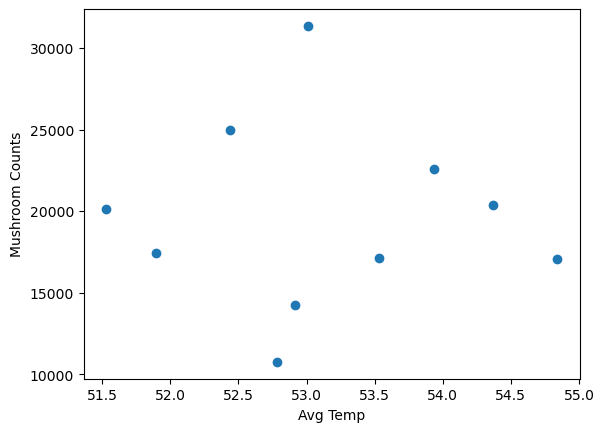

In [99]:
#OVERALL Counts and Temps -  scatter plot - 
#total counts per year
#Average Precipitation, per year
combine_overall = pd.merge(m_counts,all_te,[s],on='year')
plt.scatter(combine_overall['temp'],combine_overall['id'])

plt.xlabel('Avg Temp')
plt.ylabel('Mushroom Counts')
plt.show()

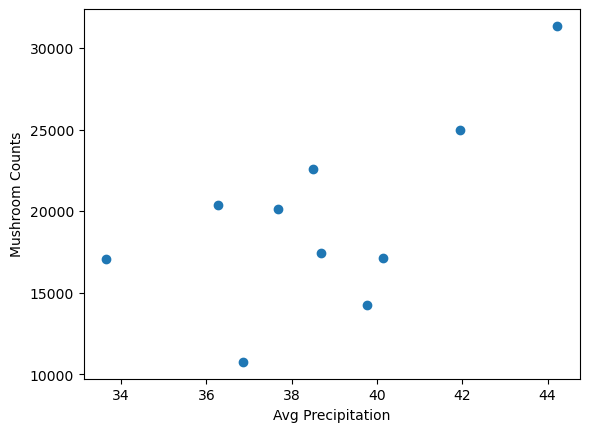

In [103]:
#OVERALL Counts and PRECIP - scatter plot 
#total counts per year
#Average Precip, per year
combine_overallp = pd.merge(m_counts,all_precip,on='year')
plt.scatter(combine_overallp['precip'],combine_overallp['id'])

plt.xlabel('Avg Precipitation')
plt.ylabel('Mushroom Counts')
plt.show()

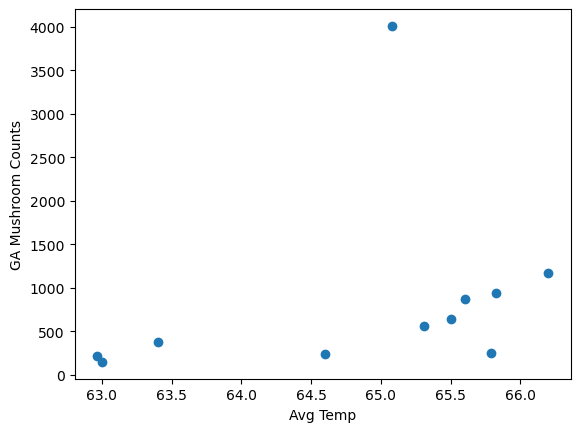

In [122]:
#Repeat for GA - Counts and Temps as scatterplot
#ga_obs_peryr are the mushroom counts for only georgia, per year
#ga_temp contains the average temp for only georgia, per year
combine_georgia = pd.merge(ga_obs_peryr_df,ga_temp,on='year')
plt.scatter(combine_georgia['temp'],combine_georgia['Observations'])

plt.xlabel('Avg Temp')
plt.ylabel('GA Mushroom Counts')
plt.show()

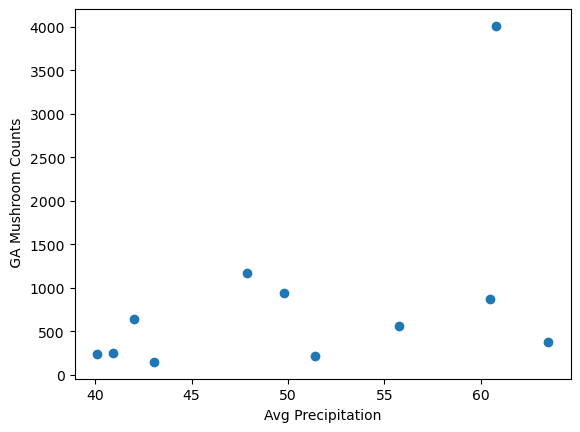

In [121]:
#Repeat for GA - Counts and PRECIP as scatterplot
#ga_obs_peryr are the mushroom counts for only georgia, per year
#ga_precip contains the average temp for only georgia, per year
combine_georgia_p = pd.merge(ga_obs_peryr_df,ga_precip,on='year')
plt.scatter(combine_georgia_p['precip'],combine_georgia_p['Observations'])

plt.xlabel('Avg Precipitation')
plt.ylabel(' GA Mushroom Counts')
plt.show()

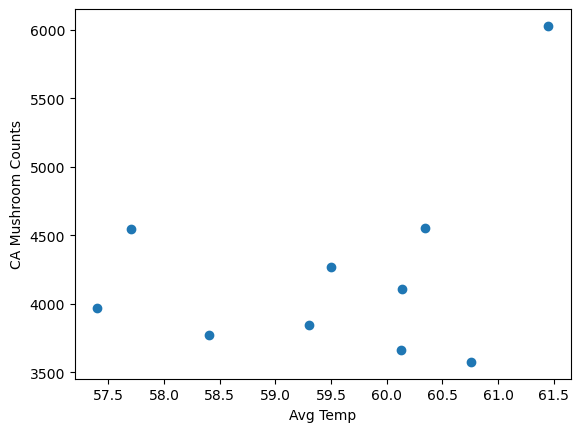

In [123]:
#Repeat for CA - Counts and Temps as scatterplot
#ca_obs_peryr are the mushroom counts for only cali, per year
#ca_temp contains the average temp for only cali, per year
combine_california = pd.merge(ca_obs_peryr_df,ca_temp,on='year')
plt.scatter(combine_california['temp'],combine_california['Observations'])

plt.xlabel('Avg Temp')
plt.ylabel('CA Mushroom Counts')
plt.show()

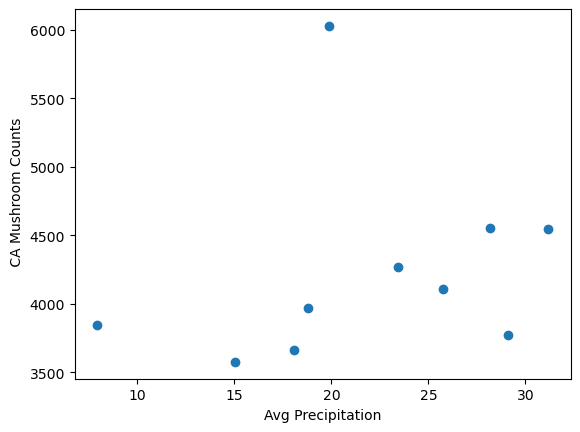

In [124]:
#Repeat for CA - Counts and PRECIP as scatterplot
#ca_obs_peryr are the mushroom counts for only cali, per year
#ca_precip contains the average temp for only cali, per year
combine_california_p = pd.merge(ca_obs_peryr_df,ca_precip,on='year')
plt.scatter(combine_california_p['precip'],combine_california_p['Observations'])

plt.xlabel('Avg Precipitation')
plt.ylabel(' CA Mushroom Counts')
plt.show()

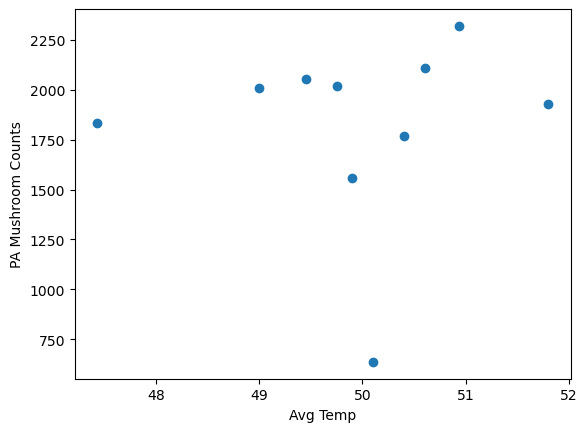

In [125]:
#Repeat for PA - Counts and Temps as scatterplot
#pa_obs_peryr are the mushroom counts for only penn, per year
#pa_temp contains the average temp for only penn, per year
combine_penn = pd.merge(pa_obs_peryr_df,pa_temp,on='year')
plt.scatter(combine_penn['temp'],combine_penn['Observations'])

plt.xlabel('Avg Temp')
plt.ylabel('PA Mushroom Counts')
plt.show()

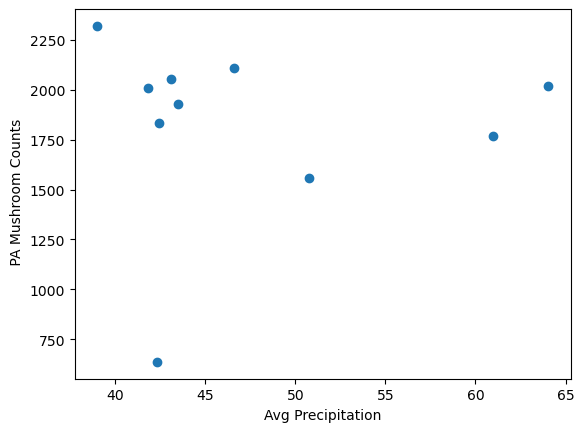

In [126]:
#Repeat for PA - Counts and PRECIP as scatterplot
#pa_obs_peryr are the mushroom counts for only cali, per year
#pa_precip contains the average temp for only cali, per year
combine_penn_p = pd.merge(pa_obs_peryr_df,pa_precip,on='year')
plt.scatter(combine_penn_p['precip'],combine_penn_p['Observations'])

plt.xlabel('Avg Precipitation')
plt.ylabel(' PA Mushroom Counts')
plt.show()